# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Loading and Cleaning the dataset

In [3]:
#Reading the dataset(CSV file)
df = pd.read_csv("../BC Vehicle Accidents 2021.csv")

#Dropping empty rows
df = df.dropna(how='all')

#Removing first 2 rows
df = df.drop([0,1])

#Cleaning the columns names, and renaming the columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns = ['road_surface', 'collision_sev', 'weather', 'speed_limit', 'number_of_injured', 'number_of_fatalities']

#Reseting the index
df = df.reset_index(drop=True)

# Testing

Checking if the dataset has loaded without error.

## First 5 rows

In [12]:
df.head()

,road_surface,collision_sev,weather,speed_limit,number_of_injured,number_of_fatalities
0,"Dry, normal",Fatal collisions,Clear and sunny,Less than 40 km per hour,2,7
1,"Dry, normal",Fatal collisions,Clear and sunny,40 km per hour,7,29
2,"Dry, normal",Fatal collisions,Clear and sunny,50 km per hour,89,209
3,"Dry, normal",Fatal collisions,Clear and sunny,60 km per hour,53,104
4,"Dry, normal",Fatal collisions,Clear and sunny,80 km per hour,174,224


## Last 5 rows

In [20]:
df.tail()

,road_surface,collision_sev,weather,speed_limit,number_of_injured,number_of_fatalities
295,Icy,Injury collisions,"Freezing rain, sleet, hail",40 km per hour,3,0
296,Icy,Injury collisions,"Freezing rain, sleet, hail",50 km per hour,71,0
297,Icy,Injury collisions,"Freezing rain, sleet, hail",60 km per hour,26,0
298,Icy,Injury collisions,"Freezing rain, sleet, hail",80 km per hour,52,0
299,Icy,Injury collisions,"Freezing rain, sleet, hail",100 km per hour,50,0


# Selecting and standardizing features

In [27]:
#Selecting features for clustering
features = ["number_of_injured", "number_of_fatalities"] #OPTIONAL: replace features
X = df[features]

#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing optimal K based on silhouette scores

In [33]:
silhouetteScores = {}
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouetteScores[k] = silhouette_score(X_scaled, labels)

k_optimal = max(silhouetteScores, key=silhouetteScores.get)
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Model Results
## 1. Optimal ***K*** based on Silhouette Scores

In [38]:
for x,y in silhouetteScores.items():
    print(x,":",y)

print("\nOptimal K = ", k_optimal)

2 : 0.954329415234031
3 : 0.9600048112588311
4 : 0.9274605911671909
5 : 0.9266107327085351
6 : 0.8448360824922853
7 : 0.852517689198775
8 : 0.8234627136817373
9 : 0.8209083798784758
10 : 0.8051499575100933
11 : 0.8029170338455648
12 : 0.7166284520249528

Optimal K =  3


## 2. Cluster sizes

In [42]:
sizes = np.bincount(labels)
print("Cluster sizes:", sizes)

Cluster sizes: [295   1   4]


## 3. Centroids

In [45]:
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

print("Centroids (injured, fatalities):")
print()
print(np.round(centroids, 1))

Centroids (injured, fatalities):

[[1.6000e+02 1.0000e+00]
 [2.5797e+04 0.0000e+00]
 [1.0550e+02 1.7850e+02]]


# Visualizing the clusters using PCA

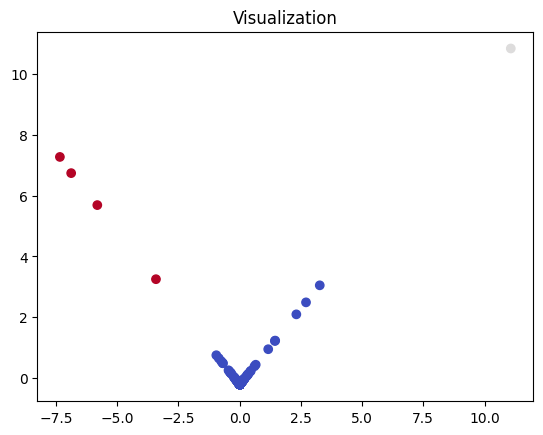

In [47]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='coolwarm')
plt.title('Visualization')
plt.show()